In [92]:
import pandas as pd 
import matplotlib.pyplot as plt 
# import seaborn as sns 
import numpy as np
import pycountry_convert as pc 




# Data analysis of 1990 – 2017 PM2.5 air pollution 

data source: https://www.kaggle.com/datasets/programmerrdai/outdoor-air-pollution

# Load the data 

In [93]:
data= pd.read_csv('PM25-air-pollution.csv')

In [94]:
data

,Entity,Code,Year,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"
0,Afghanistan,AFG,1990,65.486794
1,Afghanistan,AFG,1995,65.179512
2,Afghanistan,AFG,2000,64.922462
3,Afghanistan,AFG,2005,64.522682
4,Afghanistan,AFG,2010,65.245590
...,...,...,...,...
2503,Zimbabwe,ZWE,2013,23.111088
2504,Zimbabwe,ZWE,2014,22.805950
2505,Zimbabwe,ZWE,2015,21.733709
2506,Zimbabwe,ZWE,2016,21.726948


In [95]:
data.describe(include='all') # description of data 

,Entity,Code,Year,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"
count,2508,2340,2508.000000,2508.000000
unique,209,195,NaN,NaN
top,Afghanistan,AFG,NaN,NaN
freq,12,12,NaN,NaN
mean,NaN,NaN,2008.166667,29.014898
std,NaN,NaN,8.416282,17.822991
min,NaN,NaN,1990.000000,5.861331
25%,NaN,NaN,2003.750000,15.730996
50%,NaN,NaN,2011.500000,24.293679
75%,NaN,NaN,2014.250000,38.126608


In [96]:
len(data.Entity.unique())    # number of unique countries 

209

In [97]:
country_list= list(data.Entity.unique()) # list of unique countries 


Not interested in country codes, so we exclude them: 

In [98]:
data_withoutcode= data.drop(['Code'], axis= 1)  
data_withoutcode

,Entity,Year,"PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)"
0,Afghanistan,1990,65.486794
1,Afghanistan,1995,65.179512
2,Afghanistan,2000,64.922462
3,Afghanistan,2005,64.522682
4,Afghanistan,2010,65.245590
...,...,...,...
2503,Zimbabwe,2013,23.111088
2504,Zimbabwe,2014,22.805950
2505,Zimbabwe,2015,21.733709
2506,Zimbabwe,2016,21.726948


In [99]:
data_withoutcode.columns

Index(['Entity', 'Year',
       'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)'],
      dtype='object')

In [100]:
data_withoutcode= data_withoutcode.rename(columns={'Entity': 'Country','PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)': 'Air pollution (mcg/cm3)' }) # renaming the columns 
data_withoutcode

,Country,Year,Air pollution (mcg/cm3)
0,Afghanistan,1990,65.486794
1,Afghanistan,1995,65.179512
2,Afghanistan,2000,64.922462
3,Afghanistan,2005,64.522682
4,Afghanistan,2010,65.245590
...,...,...,...
2503,Zimbabwe,2013,23.111088
2504,Zimbabwe,2014,22.805950
2505,Zimbabwe,2015,21.733709
2506,Zimbabwe,2016,21.726948


## Questions
1. Which countries have greatest increase in pollution? 
2. Which countries have exceeded the recommended $0.005 mg/m^3$, show in the map [WHO recommendation](https://www.c40knowledgehub.org/s/article/WHO-Air-Quality-Guidelines?language=en_US#:~:text=By%20reducing%20air%20pollution%20levels,3%20%2D%204%20days%20per%20year.)

# Which countries have greatest increase in pollution?

In [101]:
earlierst_record= data_withoutcode.groupby(['Country']).min('Year').iloc[:, -1]       # earliest year pollution record 

In [102]:
latest_record= data_withoutcode.groupby(['Country']).max('Year').iloc[:, -1] # latest year pollution record 

In [103]:
earlierst_record

Country
Afghanistan       56.287048
Albania           18.189934
Algeria           33.366825
American Samoa    12.382730
Andorra           10.255835
                    ...    
Vietnam           29.626728
World             44.261616
Yemen             45.144806
Zambia            27.355673
Zimbabwe          21.726948
Name: Air pollution (mcg/cm3), Length: 209, dtype: float64

In [104]:
latest_record

Country
Afghanistan       66.835724
Albania           22.772537
Algeria           39.853275
American Samoa    15.390642
Andorra           14.118742
                    ...    
Vietnam           39.365398
World             50.773491
Yemen             54.260288
Zambia            32.764847
Zimbabwe          23.319908
Name: Air pollution (mcg/cm3), Length: 209, dtype: float64

In [105]:
change= latest_record-earlierst_record # compute change 
change 

Country
Afghanistan       10.548676
Albania            4.582603
Algeria            6.486450
American Samoa     3.007913
Andorra            3.862907
                    ...    
Vietnam            9.738670
World              6.511875
Yemen              9.115482
Zambia             5.409174
Zimbabwe           1.592960
Name: Air pollution (mcg/cm3), Length: 209, dtype: float64

Text(0, 0.5, 'Country')

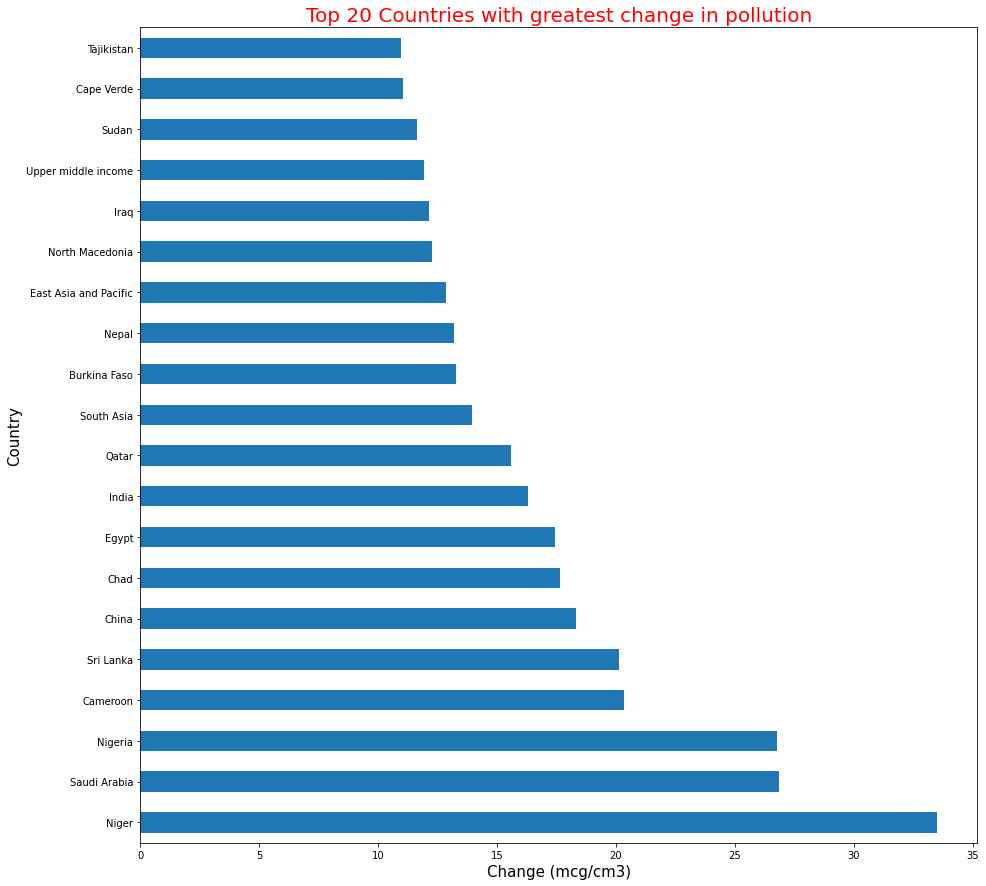

In [106]:
fig=plt.figure(figsize= (15,15 ))
change.sort_values(ascending=False)[:20].plot.barh()# top 20 countries with greates change 
plt.title('Top 20 Countries with greatest change in pollution', fontsize=20, color='red')
plt.xlabel('Change (mcg/cm3)', fontsize= 15); 
plt.ylabel('Country', fontsize= 15)

## Exploring the change intensity in map 

### Importing a list of all world countries' names 

In [107]:
from country_list import countries_for_language 
countries= dict(countries_for_language('en'))
countrylist= list(countries.values())
country_list[:10] # showing the first 10 countries 


['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia']

In [108]:
countrylist= list(map(lambda x: x.lower(), countrylist)) # mapping all countries to lowercase 

In [109]:
countrylist[:10] #first 10 elements 

['afghanistan',
 'åland islands',
 'albania',
 'algeria',
 'american samoa',
 'andorra',
 'angola',
 'anguilla',
 'antarctica',
 'antigua & barbuda']

### Extracting the actual countries from the data 

There are some observations containing like "middle-income" or other "noncountry" labels. We exclude them from the geographical plot 

In [110]:
change 

Country
Afghanistan       10.548676
Albania            4.582603
Algeria            6.486450
American Samoa     3.007913
Andorra            3.862907
                    ...    
Vietnam            9.738670
World              6.511875
Yemen              9.115482
Zambia             5.409174
Zimbabwe           1.592960
Name: Air pollution (mcg/cm3), Length: 209, dtype: float64

In [111]:
change_plottable= {}     # dictionary for plotting 

for country, value in dict(change).items():   
    if country.lower() in countrylist: 
        change_plottable[country] =value 
        
    
    

In [112]:
change_plottable

{'Afghanistan': 10.548675537109375,
 'Albania': 4.582603454589844,
 'Algeria': 6.4864501953125,
 'American Samoa': 3.0079126358032227,
 'Andorra': 3.8629074096679705,
 'Angola': 4.662727355957038,
 'Argentina': 4.071147918701172,
 'Armenia': 6.385105133056648,
 'Australia': 2.4969406127929688,
 'Austria': 4.388721466064453,
 'Azerbaijan': 4.014251708984375,
 'Bahamas': 4.406705856323246,
 'Bahrain': 9.84613037109375,
 'Bangladesh': 10.667633056640625,
 'Barbados': 6.22331428527832,
 'Belarus': 5.820268630981445,
 'Belgium': 4.75440788269043,
 'Belize': 5.788553237915043,
 'Benin': 10.81022834777832,
 'Bermuda': 3.19675350189209,
 'Bhutan': 6.737518310546882,
 'Bolivia': 8.18620491027832,
 'Botswana': 2.6303329467773438,
 'Brazil': 3.2966089248657227,
 'Brunei': 1.667757034301757,
 'Bulgaria': 8.410749435424805,
 'Burkina Faso': 13.274967193603516,
 'Burundi': 3.0126991271972656,
 'Cambodia': 6.206060409545898,
 'Cameroon': 20.336437225341797,
 'Canada': 2.196077823638916,
 'Cape Verde'

### Plotting the data 

In [113]:
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [114]:
init_notebook_mode(connected=True) 

In [115]:
# defining data for plot 

data_forplot= dict(type= 'choropleth', 
                  locations= list(change_plottable.keys()), 
                  locationmode= 'country names', 
                   colorscale= 'Portland', 
                   text= list(change_plottable.keys()), 
                   z= list(change_plottable.values()), 
                   colorbar= {'title': 'Change intensity (mcg/m3)'}
                  )

In [116]:
# definingn layout 
layout= dict(title= 'Change in intensity of PM 2.5 pollution, 1990 – 2017', geo= dict(showframe= False, projection= {'type': 'mercator'}))


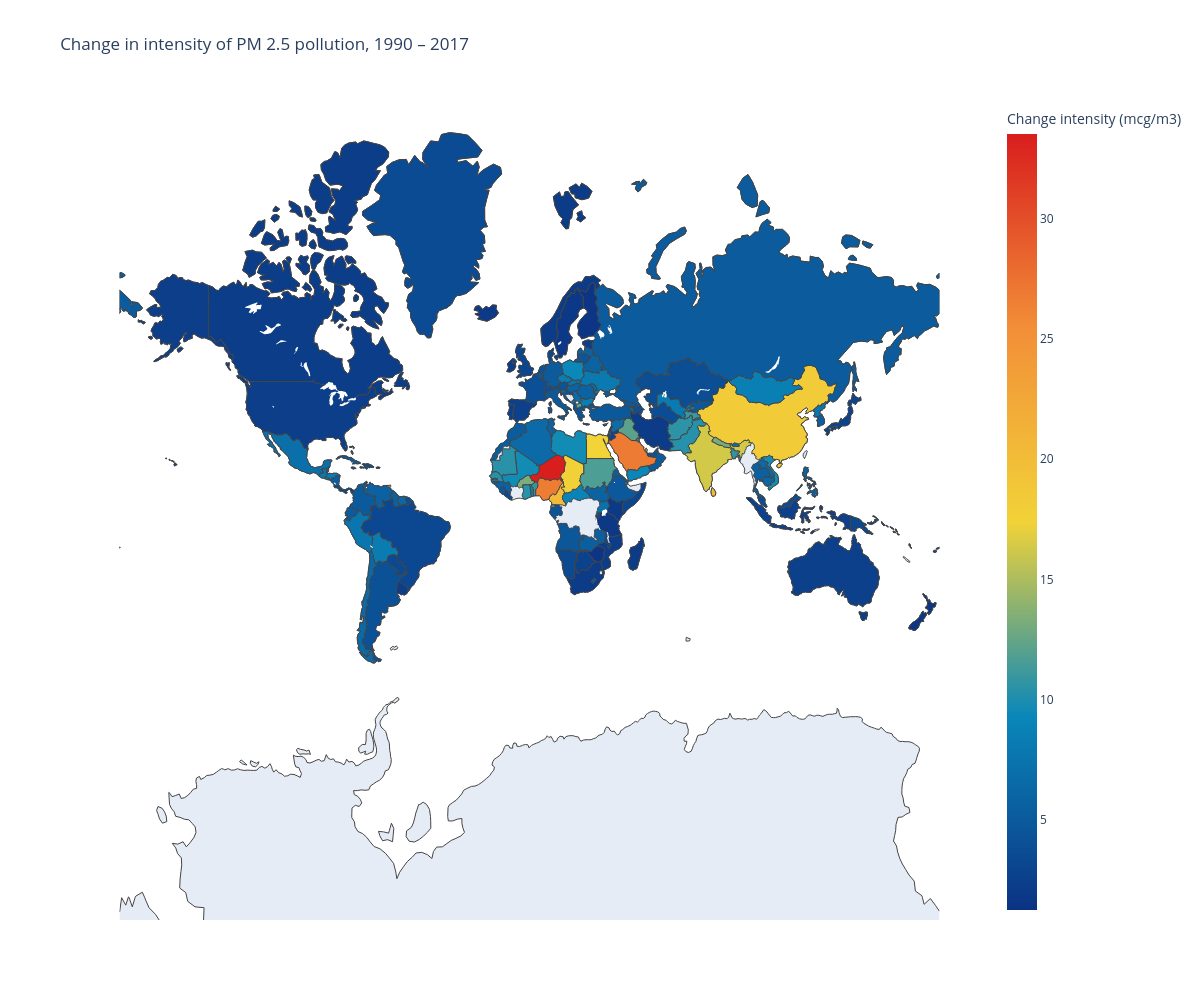

In [117]:
import plotly.graph_objs as go 



chmap= go.Figure(data= [data_forplot], layout=layout) 

chmap.update_layout(
    autosize=False,
    width=1000,
    height=1000,)          # change graph size 


iplot(chmap)

#  Which countries have exceeded the recommended $0.005 mg/m^3$, show the intensity of compare to the recommended value 

In [118]:
latest_record

Country
Afghanistan       66.835724
Albania           22.772537
Algeria           39.853275
American Samoa    15.390642
Andorra           14.118742
                    ...    
Vietnam           39.365398
World             50.773491
Yemen             54.260288
Zambia            32.764847
Zimbabwe          23.319908
Name: Air pollution (mcg/cm3), Length: 209, dtype: float64

In [119]:
latest_record.sort_values(ascending=True)

Country
Finland           7.412718
New Zealand       7.420696
Brunei            7.570823
Sweden            7.947532
Iceland           8.430091
                   ...    
Niger            94.053818
Qatar            94.403893
Saudi Arabia     97.432289
India            97.599380
Nepal           100.784431
Name: Air pollution (mcg/cm3), Length: 209, dtype: float64

In [120]:
recommended_PMvalue= 5 # (mcg/m3) WHO recommendation 

In [121]:
list(change_plottable.keys())[:10] # contains all countries' names that can be plotted 

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria']

In [122]:
latest_record_plottable= latest_record[list(change_plottable.keys())] # extracting observations that are plottable, since some entities (e.g. middle-income countries etc.)

In [123]:
latest_record_plottable

Country
Afghanistan       66.835724
Albania           22.772537
Algeria           39.853275
American Samoa    15.390642
Andorra           14.118742
                    ...    
Venezuela         22.369261
Vietnam           39.365398
Yemen             54.260288
Zambia            32.764847
Zimbabwe          23.319908
Name: Air pollution (mcg/cm3), Length: 180, dtype: float64

Now we want to compare to our base value, which is the WHO recommended annual PM2.5 concentration of $5\mu/m^3$: 

In [124]:
latest_record_plottable_rel= latest_record_plottable/recommended_PMvalue    # relative value of PM 2.5 compare to the recommended value 

In [125]:
latest_record_plottable_ex= latest_record_plottable- recommended_PMvalue # by how much each country have exceeded the recommended value 

In [126]:
latest_record_plottable_ex.head()

Country
Afghanistan       61.835724
Albania           17.772537
Algeria           34.853275
American Samoa    10.390642
Andorra            9.118742
Name: Air pollution (mcg/cm3), dtype: float64

In [127]:
list(latest_record_plottable.values)

[66.83572387695312,
 22.772537231445312,
 39.853275299072266,
 15.390642166137695,
 14.118741989135742,
 36.44811630249024,
 17.38298225402832,
 38.61227416992188,
 11.04726505279541,
 16.866687774658203,
 23.942914962768555,
 21.7744255065918,
 72.60467529296875,
 70.79390716552734,
 29.303489685058597,
 24.585847854614254,
 17.587495803833008,
 28.800445556640625,
 40.47068405151367,
 14.84311294555664,
 43.96188354492188,
 29.57280921936035,
 25.724720001220703,
 15.95528507232666,
 7.570822715759277,
 27.55988121032715,
 46.56216812133789,
 41.2488899230957,
 31.408935546875,
 77.05174255371094,
 8.62446117401123,
 38.63361358642578,
 58.32609939575195,
 68.90049743652344,
 27.24586677551269,
 70.54203033447266,
 21.49784469604492,
 21.75399208068848,
 19.702133178710938,
 22.12263298034668,
 24.78731918334961,
 20.90657615661621,
 24.40361785888672,
 13.25493049621582,
 45.950809478759766,
 24.276123046875,
 17.299779891967773,
 19.979188919067383,
 88.21338653564453,
 33.62826538

## Plotting the data (relative to recommended value)

In [137]:
# defining data for plot 

data_forplot= dict(type= 'choropleth', 
                  locations= list(latest_record_plottable_rel.index) , 
                  locationmode= 'country names', 
                   colorscale= 'Portland', 
                   text= list(latest_record_plottable_rel.index) , 
                   z= list(latest_record_plottable_rel.values), 
                   colorbar= {'title': 'Relative to 5 mcg/m3 (mcg/m3)'}
                  )





In [138]:
# definingn layout 
layout= dict(title= '2017 PM 2.5 pollution, relative to WHO recommendation', geo= dict(showframe= False, projection= {'type': 'mercator'}))

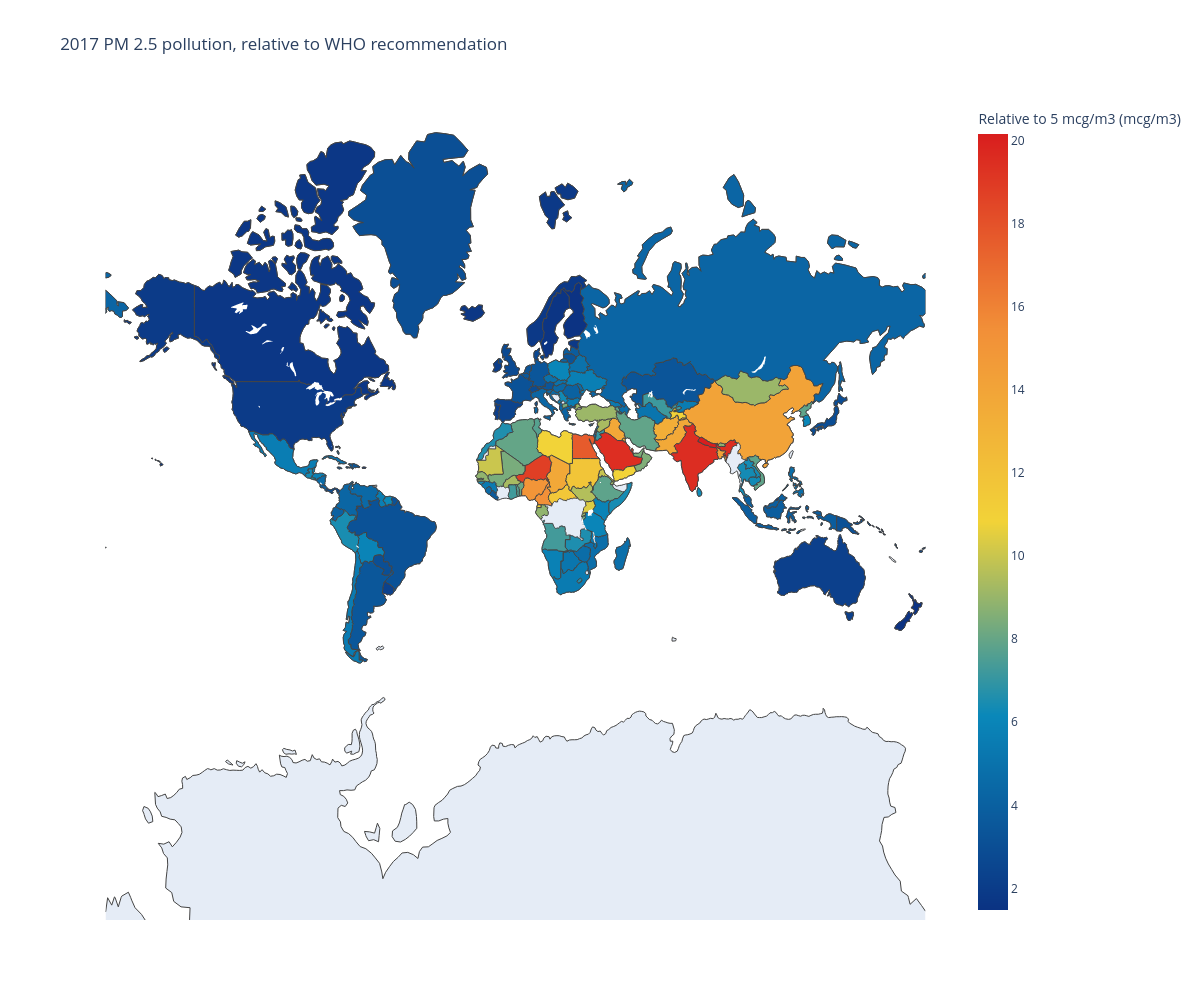

In [139]:
import plotly.graph_objs as go 



chmap= go.Figure(data= [data_forplot], layout=layout) 

chmap.update_layout(
    autosize=False,
    width=1000,
    height=1000,)          # change graph size 


iplot(chmap)

In [140]:
# chmap.write_html('2017_PM2.5_relative')

## Plotting the data (exceeding the recommended value)

In [131]:
# defining data for plot 

data_forplot= dict(type= 'choropleth', 
                  locations= list(latest_record_plottable_ex.index) , 
                  locationmode= 'country names', 
                   colorscale= 'Portland', 
                   text= list(latest_record_plottable_ex.index) , 
                   z= list(latest_record_plottable_ex.values), 
                   colorbar= {'title': 'Exceeding the 5 mcg/m3 (mcg/m3)'}
                  )





In [132]:
# definingn layout 
layout= dict(title= '2017 PM 2.5 pollution, exceeding the WHO recommendation', geo= dict(showframe= False, projection= {'type': 'mercator'}))

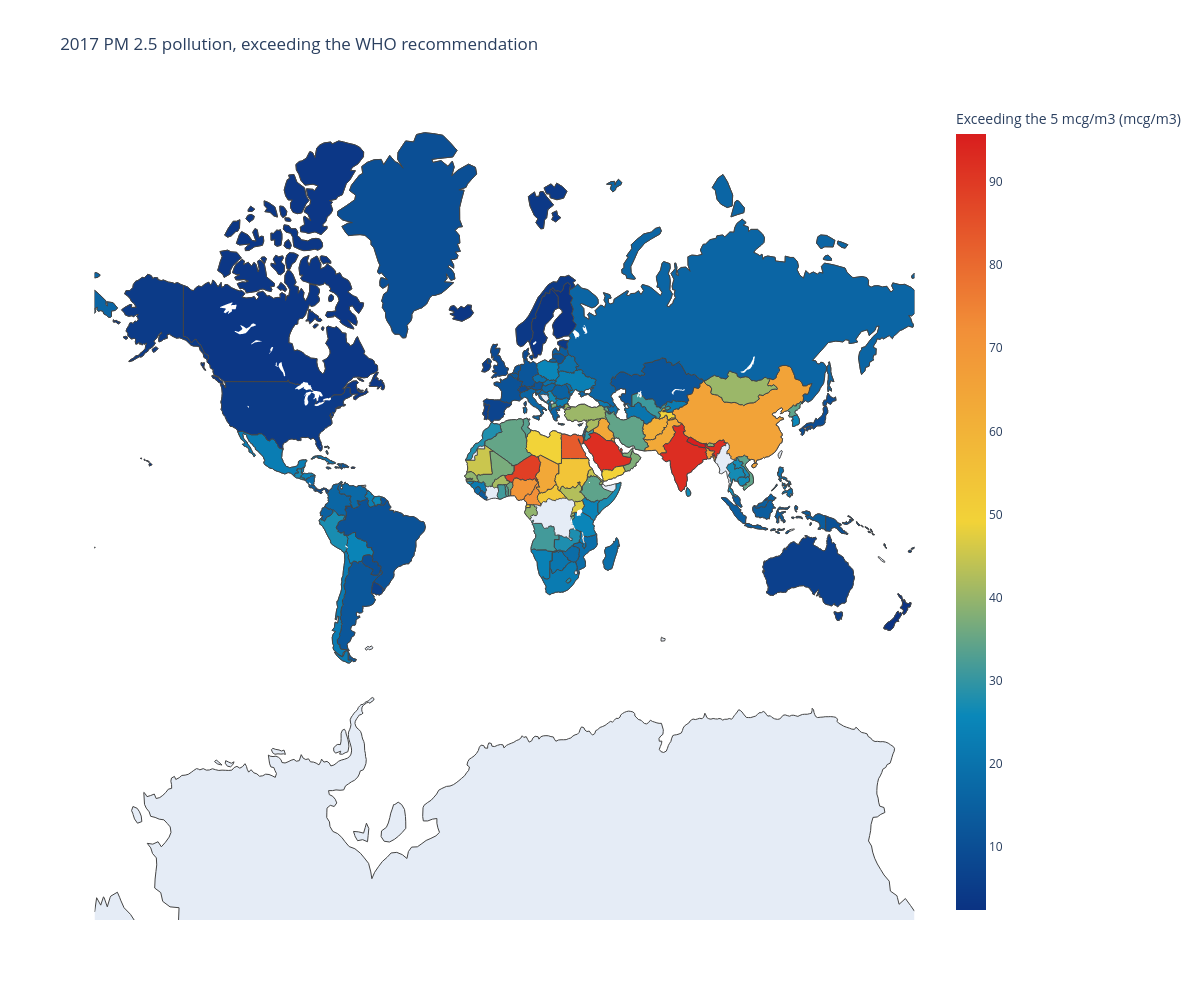

In [133]:
import plotly.graph_objs as go 



chmap= go.Figure(data= [data_forplot], layout=layout) 

chmap.update_layout(
    autosize=False,
    width=1000,
    height=1000,)          # change graph size 


iplot(chmap)

In [ ]:
# chmap.write_html('2017_PM2.5_exceeded')

## Findings 

- No country reached the recommendation 
